<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/TEGprocessSim2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Process simulation of TEG dehydration process using NeqSim
This interactive web page is used for simulation of a TEG dehydration process used for water removal from natural gas. 

Rigorous unit operation models are applied for all unit operations (absorbers, separators, destillation columns, heat-exchanger, compressors and pumps). The unit operation models are desicribed in the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).

The process flow diagram of the TEG dehydration process is illustrated in the following figure. The steps in running a calculation is done by:

1. Initialize model 
2. Set input parameters for the TEG process (such as temperatures, pressures, flow rates).
3. Run the process simulation (Ctrl+F9)
4. Report results

In section 5 feed gas composition and model parameters can be specified. In section 6 sub model calculations can be run.

#TEG process flow diagram
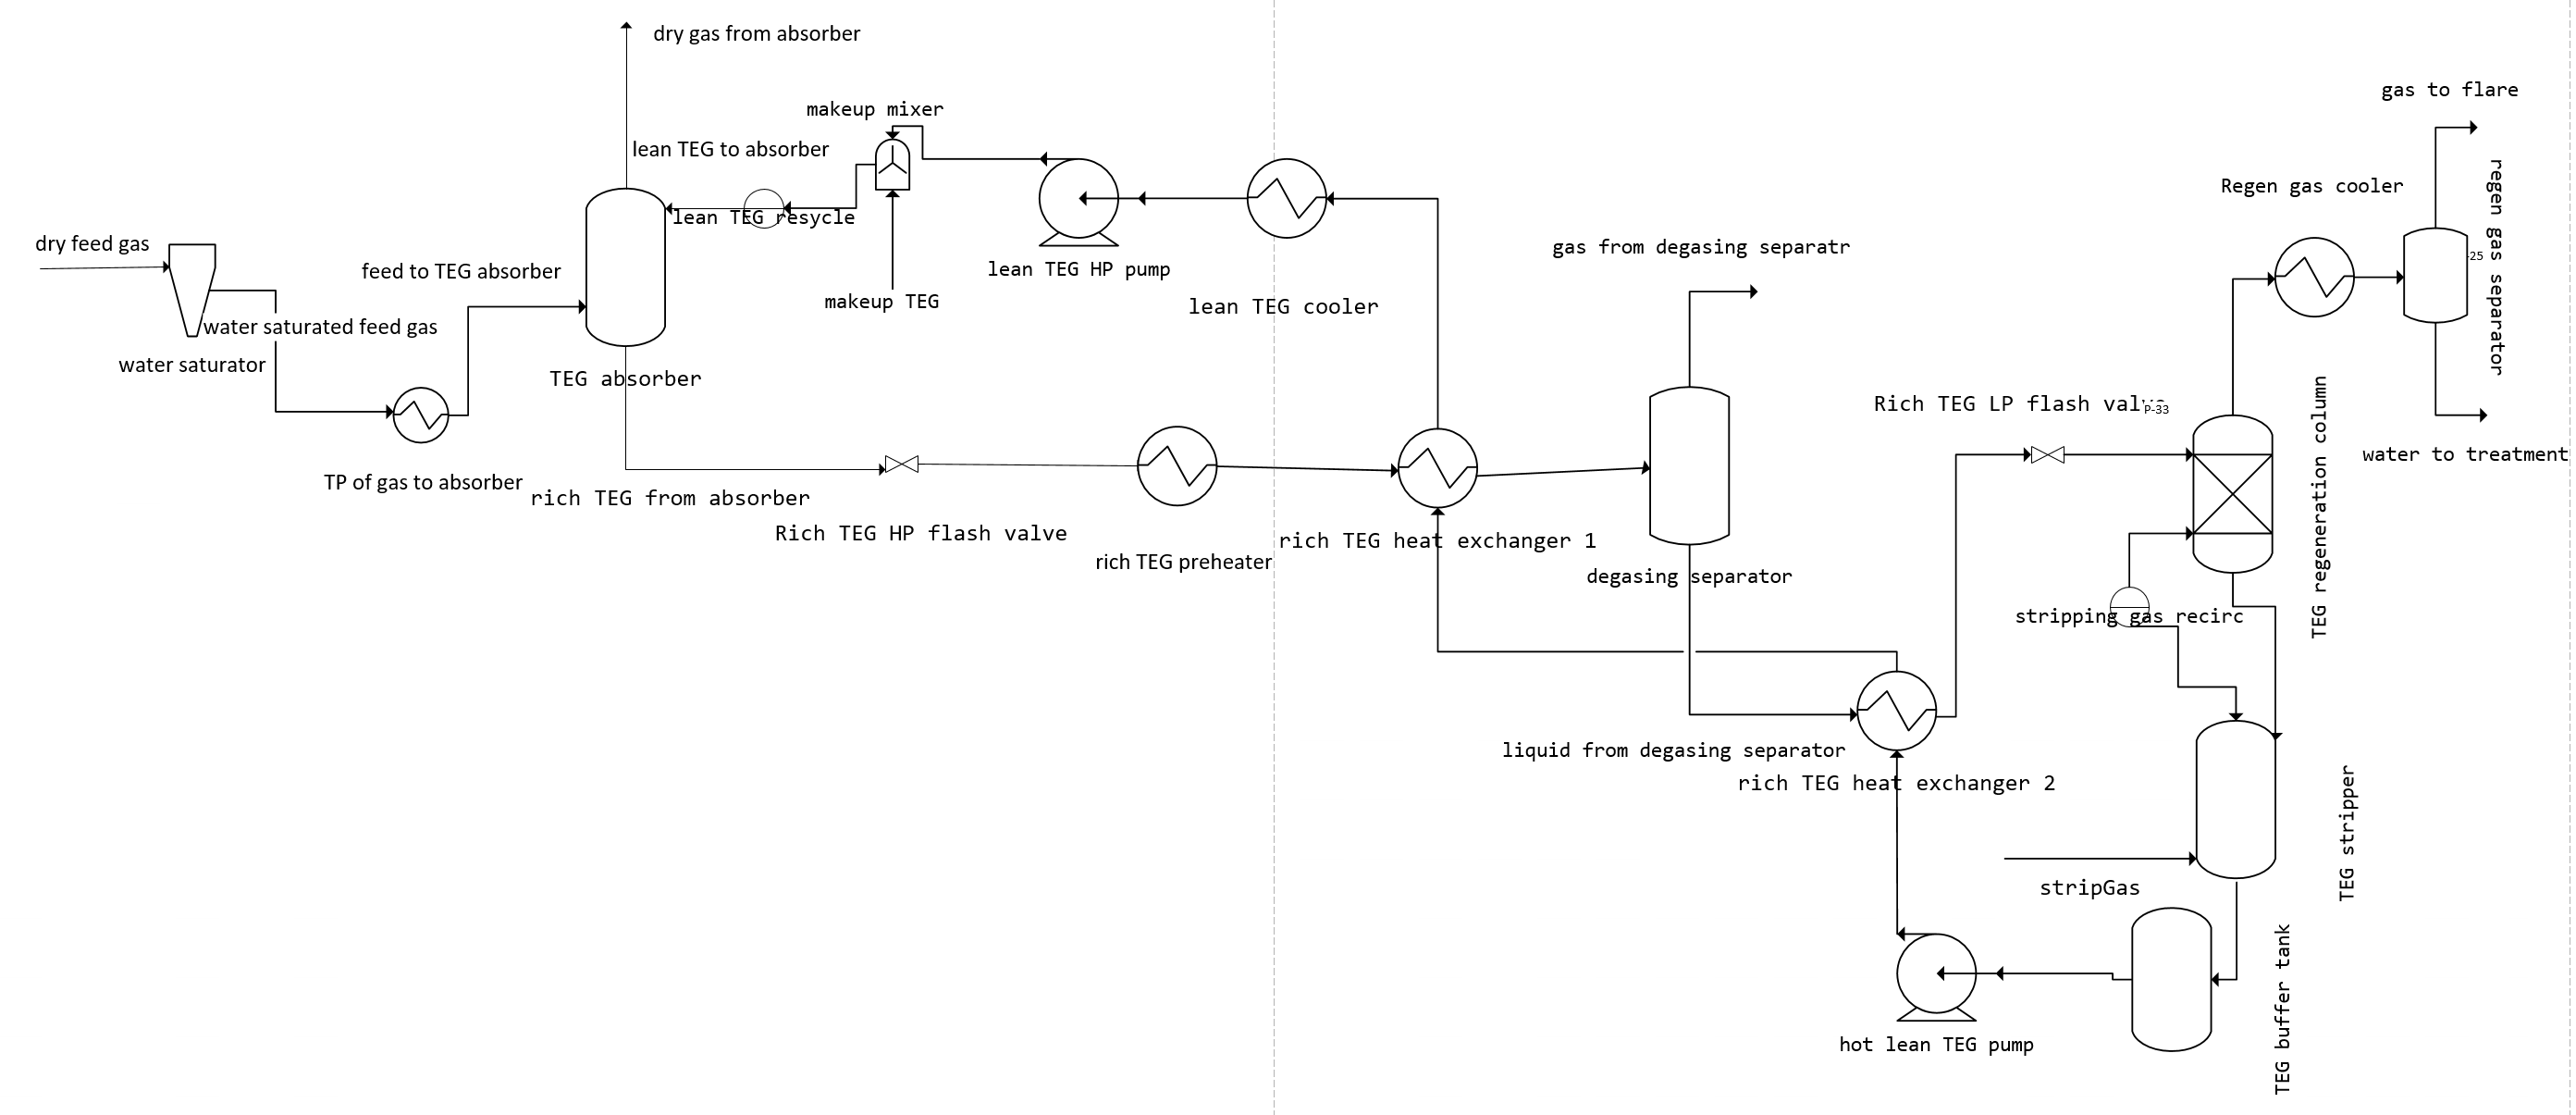

# 1. Initialize model
This section reads the predifined TEG process model from file.

In [ ]:
#@markdown Run this cell to initialize the process model.
##Setting up the Colab page to use neqsim
%%capture
!pip install neqsim
from neqsim.process import openprocess
import urllib
import time
from neqsim.thermo.thermoTools import hydt
# Importing the TEG process from file
!wget https://github.com/equinor/neqsimprocess/raw/master/lib/TEGprocess2.neqsim
# importing the process from the stored file
# See: https://github.com/equinor/neqsimprocess/blob/master/src/neqsimprocess/glycol/TEGprocess.java
# See Figure 1 for process flow diagram
TEGprocess = openprocess('TEGprocess2.neqsim')
 

#2. Set input paramteres
Specify input parameters for the TEG process models.


In [ ]:
#@markdown Feed gas rate [MSm3/day]:
feedGasRate =    10.4#@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setFlowRate(float(feedGasRate), 'MSm3/day')

#@markdown Feed gas temperature [C]:
feedGasTemperature = 25.4   #@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setTemperature(float(feedGasTemperature), 'C')

#@markdown Feed gas pressure [bara]:
feedGasPressure = 52.21   #@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setPressure(float(feedGasPressure), "bara")

#@markdown Absorber feed gas temperature [C]:
absorberGasTemperature = 30.4   #@param {type:"number"}
TEGprocess.getUnit("TP of gas to absorber").setOutTemperature(float(absorberGasTemperature), 'C')

#@markdown Absorber feed gas pressure [bara]:
absorberGasPressure = 52.21   #@param {type:"number"}
TEGprocess.getUnit("TP of gas to absorber").setOutPressure(float(absorberGasPressure), "bara")

#@markdown Lean TEG to absorber [kg/hr]:
leanTEGflowrate = 6862.5   #@param {type:"number"}
TEGprocess.getUnit("lean TEG to absorber").setFlowRate(float(leanTEGflowrate), "kg/hr")

#@markdown Lean TEG to absorber temperature [C]:
leanTEGtemperature = 43.5   #@param {type:"number"}
TEGprocess.getUnit("lean TEG cooler").setOutTemperature(273.15+leanTEGtemperature)   

#@markdown Pressure down stream rich TEG HP flash valve [bara]:
pressureOutHPflashvalve = 4.9   #@param {type:"number"}
TEGprocess.getUnit("Rich TEG HP flash valve").setOutletPressure(float(pressureOutHPflashvalve))

#@markdown Pressure down stream rich TEG LP flash valve [bara]:
pressureOutLPflashvalve = 1.23   #@param {type:"number"}
TEGprocess.getUnit("Rich TEG LP flash valve").setOutletPressure(float(pressureOutLPflashvalve))

#@markdown Regenerator condenser temperature [C]:
condenserTemperature = 101.0   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").getCondenser().setOutTemperature(float(condenserTemperature+273.15))

#@markdown Regenerator reboiler temperature [C]:
reboilerTemperature = 205.5   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").getReboiler().setOutTemperature(float(reboilerTemperature+273.15))

#@markdown Regenerator reboiler pressure [bara]:
reboilerPressure = 1.23   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").setBottomPressure(float(reboilerPressure))

#@markdown Regenerator condenser pressure [bara]:
condenserPressure = 1.1   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").setTopPressure(float(condenserPressure))

#@markdown Regenerator gas cooler temperature [baCra]:
coolerGasTemp = 37.5
TEGprocess.getUnit("regen gas cooler").setOutTemperature(273.15+coolerGasTemp)

#@markdown Stripping gas rate [Sm3/hr]:
strippingGasRate = 90.0   #@param {type:"number"}
TEGprocess.getUnit("stripGas").setFlowRate(float(strippingGasRate), "Sm3/hr")

#@markdown Hot lean TEG pump out pressure [bara]:
hotPumpPressure = 20.0   #@param {type:"number"}
TEGprocess.getUnit("hot lean TEG pump").setOutletPressure(float(hotPumpPressure)) 

TEGprocess.getUnit("stripGas").setPressure(1.23, "bara")
TEGprocess.getUnit("stripGas").setTemperature(80.0, 'C')
TEGprocess.getUnit("TEG buffer tank").setOutTemperature(273.15+185.0)

#3. Run process simulation
Run process model calculations.


In [ ]:
#@markdown Run this cell to run process simulation. Calculation time is typically 30-200 sec.
#Run the process calculations
tic = time.perf_counter()
TEGprocess.run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")

Simulation run in 168.7222 seconds


# 4. Read and report results
In this section results are read from the model and results will be reported.

In [ ]:
#@markdown Run this cell to read results and present a report of the process simulation.
#Read results
wetGasRatekghr = TEGprocess.getUnit("water saturated feed gas").getFlowRate("kg/hr")
waterInWetGasppm = TEGprocess.getUnit("water saturated feed gas").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInDryGasppm = TEGprocess.getUnit("dry gas from absorber").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInWetGaskgMSm3 = waterInWetGasppm*0.01802*101325.0/(8.314*288.15)
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
waterInWetGaskghr = waterInWetGaskgMSm3*TEGprocess.getUnit("water saturated feed gas").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskghr = waterInDryGaskgMSm3*TEGprocess.getUnit("dry gas from absorber").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
wtLeanTEGFromReboiler = TEGprocess.getUnit("TEG regeneration column").getLiquidOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtLeanTEGFromStripper = TEGprocess.getUnit("TEG stripper").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtRichTEGFromAbsorber = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
richTEGtemperature = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getTemperature("C")
waterInRichTEGkghr = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water")*TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getFlowRate("kg/hr")
TEGcirculationratelitreperkg = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")*wtLeanTEGFromStripper/100/waterInWetGaskghr
richTEGtemperatureAfterDepres = TEGprocess.getUnit("Rich TEG HP flash valve").getOutStream().getFluid().getTemperature("C")
RichTEGwtprbinary = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")/(TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")+TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water"))*100
reboilerdutykW = TEGprocess.getUnit("TEG regeneration column").getReboiler().getDuty()/1.0e3
condenserdutykW = TEGprocess.getUnit("TEG regeneration column").getCondenser().getDuty()/1.0e3
condensertemperature= TEGprocess.getUnit("TEG regeneration column").getCondenser().getTemperature()-273.15
reboilertemperature= TEGprocess.getUnit("TEG regeneration column").getReboiler().getTemperature()-273.15
TEGmakeupkghr = TEGprocess.getUnit("TEG makeup calculator").getOutputVariable().getFluid().getFlowRate("kg/hr")
TEGmakeupkgMSm3 = TEGmakeupkghr/TEGprocess.getUnit("dry feed gas").getFlowRate("Sm3/day")/1.0e6*24
leanTEGflow = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")
richTEGflow = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFlowRate("kg/hr")
pump1DutykW = TEGprocess.getUnit("hot lean TEG pump").getEnergy()/1.0e3
pump2DutykW = TEGprocess.getUnit("lean TEG HP pump").getEnergy()/1.0e3
flashGasRate = TEGprocess.getUnit("gas from degasing separator").getFlowRate("kg/hr")
gasToFLareRatekghr = TEGprocess.getUnit("gas to flare").getFlowRate("kg/hr")
stripGasRatekghr = TEGprocess.getUnit("stripGas").getFlowRate("kg/hr")
waterToTreatment = TEGprocess.getUnit("water to treatment").getFlowRate("kg/hr")
TEGinwatertoTreatmentwtprecent = TEGprocess.getUnit("water to treatment").getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
flowFromReboiler = TEGprocess.getUnit("TEG regeneration column").getReboiler().getLiquidOutStream().getFlowRate("kg/hr")
richTEGpreheaterDutykW = TEGprocess.getUnit("rich TEG preheater").getDuty()/1000.0
richTEGpreheaterTemperature = TEGprocess.getUnit("rich TEG preheater").getOutStream().getTemperature("C")
richTEGtemperatureToFlashDrum = TEGprocess.getUnit("rich TEG heat exchanger 1").getOutStream(0).getTemperature("C")
richTEGtemperatureToLPflashValve = TEGprocess.getUnit("rich TEG heat exchanger 2").getOutStream(0).getTemperature("C")
richTEGtemperatureOutOfLPflashValve = TEGprocess.getUnit("Rich TEG LP flash valve").getOutStream().getTemperature("C")
waterInGasFromCondenser= TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFlowRate("kg/hr")*TEGprocess.getUnit("TEG regeneration column").getCondenser().getGasOutStream().getFluid().getPhase(0).getWtFrac("water")


print('Wet gas rate ', wetGasRatekghr, ' kg/hr')
print('Water in wet gas ', waterInWetGasppm, ' ppm (mol)')
print('Water in dry gas ', waterInDryGasppm, ' ppm (mol)')
print('Water in wet gas ', waterInWetGaskgMSm3, ' kg/MSm3')
print('Water in dry gas ', waterInDryGaskgMSm3, ' kg/MSm3')
print('wt% TEG from absorber' , wtRichTEGFromAbsorber, ' wt%')
print('wt% TEG from reboiler ', wtLeanTEGFromReboiler, ' wt%')
print('wt% TEG from stripper ', wtLeanTEGFromStripper, ' wt%')
print('Reboiler duty ', reboilerdutykW, ' kW')
print('Condenser duty ', condenserdutykW, ' kW')
print('rich TEG preheater duty ', richTEGpreheaterDutykW, ' kW')
print('temperature from condenser ', condensertemperature, ' C')
print('temperature from reboiler ', reboilertemperature, ' C')
print('TEG makeup ', TEGmakeupkghr, ' kg/hr')
print('lean TEG flow ', leanTEGflow, ' kg/hr')
print('rich TEG flow ', richTEGflow, ' kg/hr')
print('hot lean TEG pump duty ', pump1DutykW, ' kW')
print('lean TEG HP pump duty ', pump2DutykW, ' kW')
print('gas from degasing separator ', flashGasRate, ' kg/hr')
print('gas to flare ', gasToFLareRatekghr, ' kg/hr')
print('temperature from TEG preheater ', richTEGpreheaterTemperature, ' C')


hydFluid = TEGprocess.getUnit("dry gas from absorber").getFluid().clone()
hydFluid.setPressure(70.0)
hydFluid.setTemperature(-25.0, 'C')
#waterDewPointTemperature = hydt(hydFluid)-273.15
waterdt = hydt(hydFluid)-273.15
print('Water dew point temperature (hydrate temperature) of dry gas (@70 bara) ', waterdt, ' C')

Wet gas rate  361103.7678780798  kg/hr
Water in wet gas  754.1231186125203  ppm (mol)
Water in dry gas  19.520005010113476  ppm (mol)
Water in wet gas  574.7579800572262  kg/MSm3
Water in dry gas  14.877250641727626  kg/MSm3
wt% TEG from absorber 94.9599770168235  wt%
wt% TEG from reboiler  99.09472364408242  wt%
wt% TEG from stripper  99.82198235112088  wt%
Reboiler duty  390.37787030195176  kW
Condenser duty  -41.02575591821641  kW
rich TEG preheater duty  41.025561027786  kW
temperature from condenser  101.0  C
temperature from reboiler  205.5  C
TEG makeup  0.46596473253959836  kg/hr
lean TEG flow  6862.499999999999  kg/hr
rich TEG flow  7213.587007716541  kg/hr
hot lean TEG pump duty  4.98015623448696  kW
lean TEG HP pump duty  7.984665072821779  kW
gas from degasing separator  54.27775625357206  kg/hr
gas to flare  121.10255383411778  kg/hr
temperature from TEG preheater  41.318202776169585  C
Water dew point temperature (hydrate temperature) of dry gas (@70 bara)  -18.5936841365

# 5. Advanced 
In this section the user can modify the settings og the TEG process model and run sub
calculations.

## 5.1 Modify feed fluid composition
The process model uses a
default feed fluid composotion. To define a alternative feed fluid composition use the followong form and run the cell.


In [ ]:
a = 3


## 5.2 Set TEG process model parameters
The TEG process
is set up
with typical
model parameters suvh as number of equilibrium stages and pump efficoencies.  These parametre
are modified in the following form.

In [ ]:
#Set TEG absorber number of equilibrium stages and stage efficiency 
TEGprocess.getUnit("TEG absorber").setNumberOfStages(5)
TEGprocess.getUnit("TEG absorber").setStageEfficiency(0.55)

#Set rich TEG heat exchanger UA value
TEGprocess.getUnit("rich TEG heat exchanger 1").setUAvalue(220.0)
TEGprocess.getUnit("rich TEG heat exchanger 2").setUAvalue(600.0)

#Set stripper parameters
TEGprocess.getUnit("TEG stripper").setNumberOfStages(4)
TEGprocess.getUnit("TEG stripper").setStageEfficiency(0.5)

#Set pump parameters
TEGprocess.getUnit("hot lean TEG pump").setIsentropicEfficiency(0.75)
TEGprocess.getUnit("lean TEG HP pump").setIsentropicEfficiency(0.75)

# 6. Run sub models
In this section sub models such
as the absprber can be run diconnected from the full process.

## 6.1 Absorber
In the following cell you can run absorber calculations.

In [ ]:
#@markdown Feed gas rate [MSm3/day]:
feedGasRate =    10.4#@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setFlowRate(float(feedGasRate), 'MSm3/day')

#@markdown Feed gas temperature [C]:
feedGasTemperature = 30.4   #@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setTemperature(float(feedGasTemperature), 'C')

#@markdown Feed gas pressure [bara]:
feedGasPressure = 52.21   #@param {type:"number"}
TEGprocess.getUnit("dry feed gas").setPressure(float(feedGasPressure), "bara")

#@markdown Absorber feed gas temperature [C]:
absorberGasTemperature = 30.4   #@param {type:"number"}
TEGprocess.getUnit("TP of gas to absorber").setOutTemperature(float(absorberGasTemperature), 'C')

#@markdown Absorber feed gas pressure [bara]:
absorberGasPressure = 52.21   #@param {type:"number"}
TEGprocess.getUnit("TP of gas to absorber").setOutPressure(float(absorberGasPressure), "bara")

#@markdown Lean TEG to absorber [kg/hr]:
leanTEGflowrate = 7862.5   #@param {type:"number"}
TEGprocess.getUnit("lean TEG to absorber").setFlowRate(float(leanTEGflowrate), "kg/hr")

#@markdown Lean TEG to absorber composition [wt%]:
wtFracTEG = 0.99   #@param {type:"number"}
#wtfrac(TEGprocess.getUnit("lean TEG to absorber").getFluid(), [0.0, 0.0, 0.0, 0.0, wtFracTEG, 1.0-wtFracTEG])

#@markdown Lean TEG to absorber temperature [C]:
leanTEGtemperature = 43.5   #@param {type:"number"}
TEGprocess.getUnit("lean TEG cooler").setOutTemperature(273.15+leanTEGtemperature)

#Run the process calculations
tic = time.perf_counter()
TEGprocess.getUnit("dry feed gas").run()
TEGprocess.getUnit("water saturator").run()
TEGprocess.getUnit("water saturated feed gas").run()
TEGprocess.getUnit("TP of gas to absorber").run()
TEGprocess.getUnit("feed to TEG absorber").run()
TEGprocess.getUnit("lean TEG to absorber").run()
TEGprocess.getUnit("TEG absorber").run()
TEGprocess.getUnit("dry gas from absorber").run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")

#Read results
wetGasRatekghr = TEGprocess.getUnit("water saturated feed gas").getFlowRate("kg/hr")
waterInWetGasppm = TEGprocess.getUnit("water saturated feed gas").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInDryGasppm = TEGprocess.getUnit("dry gas from absorber").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInWetGaskgMSm3 = waterInWetGasppm*0.01802*101325.0/(8.314*288.15)
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
waterInWetGaskghr = waterInWetGaskgMSm3*TEGprocess.getUnit("water saturated feed gas").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskghr = waterInDryGaskgMSm3*TEGprocess.getUnit("dry gas from absorber").getFlowRate("Sm3/day")/1.0e6/24.0
waterInDryGaskgMSm3 = waterInDryGasppm*0.01802*101325.0/(8.314*288.15)
wtRichLeanTEGToAbsorber = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
richTEGtemperature = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getTemperature("C")
waterInRichTEGkghr = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water")*TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getFlowRate("kg/hr")
TEGcirculationratelitreperkg = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")*wtRichLeanTEGToAbsorber/100/waterInWetGaskghr
RichTEGwtprbinary = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")/(TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")+TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("water"))*100
leanTEGflow = TEGprocess.getUnit("TEG absorber").getSolventInStream().getFlowRate("kg/hr")
richTEGflow = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFlowRate("kg/hr")
wtRichTEGFromAbsorber = TEGprocess.getUnit("TEG absorber").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0


print('Wet gas rate ', wetGasRatekghr, ' kg/hr')
print('Water in wet gas ', waterInWetGasppm, ' ppm (mol)')
print('Water in dry gas ', waterInDryGasppm, ' ppm (mol)')
print('Water in wet gas ', waterInWetGaskgMSm3, ' kg/MSm3')
print('Water in dry gas ', waterInDryGaskgMSm3, ' kg/MSm3')
print('wt% TEG lean TEG to absorber' , wtRichLeanTEGToAbsorber, ' wt%')
print('wt% TEG from absorber' , wtRichTEGFromAbsorber, ' wt%')


hydFluid = TEGprocess.getUnit("dry gas from absorber").getFluid().clone()
hydFluid.setPressure(70.0)
hydFluid.setTemperature(-25.0, 'C')
waterdt = hydt(hydFluid)-273.15
print('Water dew point temperature (hydrate temperature) of dry gas (@70 bara) ', waterdt, ' C')


Simulation run in 1.3604 seconds
Wet gas rate  361183.84674036445  kg/hr
Water in wet gas  996.2467036001726  ppm (mol)
Water in dry gas  19.27200419493002  ppm (mol)
Water in wet gas  759.293448069076  kg/MSm3
Water in dry gas  14.688235818989341  kg/MSm3
wt% TEG lean TEG to absorber 99.82198927312395  wt%
wt% TEG from absorber 94.48008095224543  wt%
Water dew point temperature (hydrate temperature) of dry gas (@70 bara)  -18.733038121801002  C


## 6.2 Regenerator
In this section the regenerator can be run stand alone

In [ ]:
#@markdown Pressure down stream rich TEG LP flash valve [bara]:
pressureOutLPflashvalve = 1.23   #@param {type:"number"}
TEGprocess.getUnit("Rich TEG LP flash valve").setOutletPressure(float(pressureOutLPflashvalve))

#@markdown Regenerator condenser temperature [C]:
condenserTemperature = 101.0   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").getCondenser().setOutTemperature(float(condenserTemperature+273.15))

#@markdown Regenerator reboiler temperature [C]:
reboilerTemperature = 205.5   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").getReboiler().setOutTemperature(float(reboilerTemperature+273.15))

#@markdown Regenerator reboiler pressure [bara]:
reboilerPressure = 1.23   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").setBottomPressure(float(reboilerPressure))

#@markdown Regenerator condenser pressure [bara]:
condenserPressure = 1.1   #@param {type:"number"}
TEGprocess.getUnit("TEG regeneration column").setTopPressure(float(condenserPressure))

#@markdown Regenerator gas cooler temperature [C]:
coolerGasTemp = 37.5  #@param {type:"number"}
TEGprocess.getUnit("regen gas cooler").setOutTemperature(273.15+coolerGasTemp)

#@markdown Stripping gas rate [Sm3/hr]:
strippingGasRate = 90.0   #@param {type:"number"}
TEGprocess.getUnit("stripGas").setFlowRate(float(strippingGasRate), "Sm3/hr")

#Run the process calculations
tic = time.perf_counter()
TEGprocess.getUnit("Rich TEG LP flash valve").run()
TEGprocess.getUnit("stripGas").run()
TEGprocess.getUnit("TEG stripper").run()
TEGprocess.getUnit("stripping gas recirc").run()
TEGprocess.getUnit("gas to reboiler").run()
TEGprocess.getUnit("TEG regeneration column").run()
TEGprocess.getUnit("regen gas cooler").run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")


wtLeanTEGFromReboiler = TEGprocess.getUnit("TEG regeneration column").getLiquidOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
wtLeanTEGFromStripper = TEGprocess.getUnit("TEG stripper").getSolventOutStream().getFluid().getPhase("aqueous").getWtFrac("TEG")*100.0
reboilerdutykW = TEGprocess.getUnit("TEG regeneration column").getReboiler().getDuty()/1.0e3
condenserdutykW = TEGprocess.getUnit("TEG regeneration column").getCondenser().getDuty()/1.0e3

print('wt% TEG from reboiler ', wtLeanTEGFromReboiler, ' wt%')
print('wt% TEG from stripper ', wtLeanTEGFromStripper, ' wt%')
print('Reboiler duty ', reboilerdutykW, ' kW')
print('Condenser duty ', condenserdutykW, ' kW')

Simulation run in 15.6984 seconds
wt% TEG from reboiler  98.85771026336798  wt%
wt% TEG from stripper  99.60574024887877  wt%
Reboiler duty  385.6137422322291  kW
Condenser duty  -95.48604362857938  kW


## 6.3 Water dew point calculations
In this sectip  eater dew point and hydrate temperatures can be run as stand alone calculations.

In [ ]:
#To be implemented...